# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

<hr>

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [17]:
df = pd.read_csv('files/Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [18]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [20]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<hr>

## Exploratory Data Analysis

**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

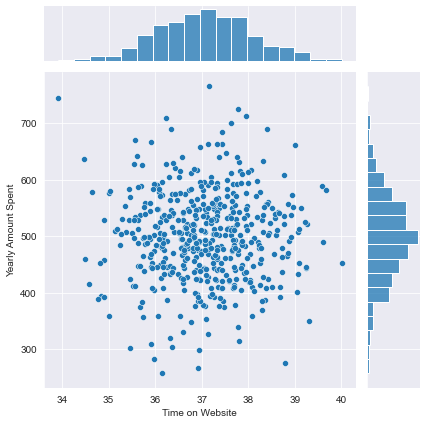

In [21]:
sns.jointplot(data=df, x='Time on Website', y='Yearly Amount Spent')

**Do the same but eith the Time on App column instead.**

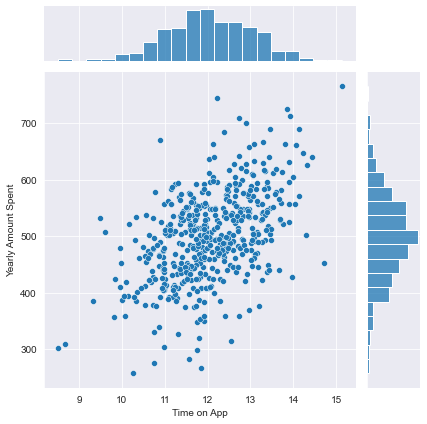

In [22]:
sns.jointplot(data=df, x='Time on App', y='Yearly Amount Spent')

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

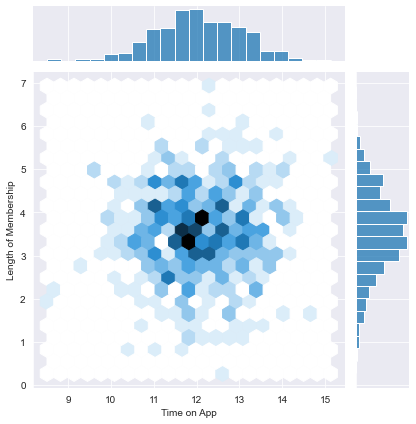

In [25]:
sns.jointplot(data=df, x='Time on App', y='Length of Membership', kind='hex')

**Let's explore these types of relationships acress the entire data set. Use pairplot to recreate the plot below.**

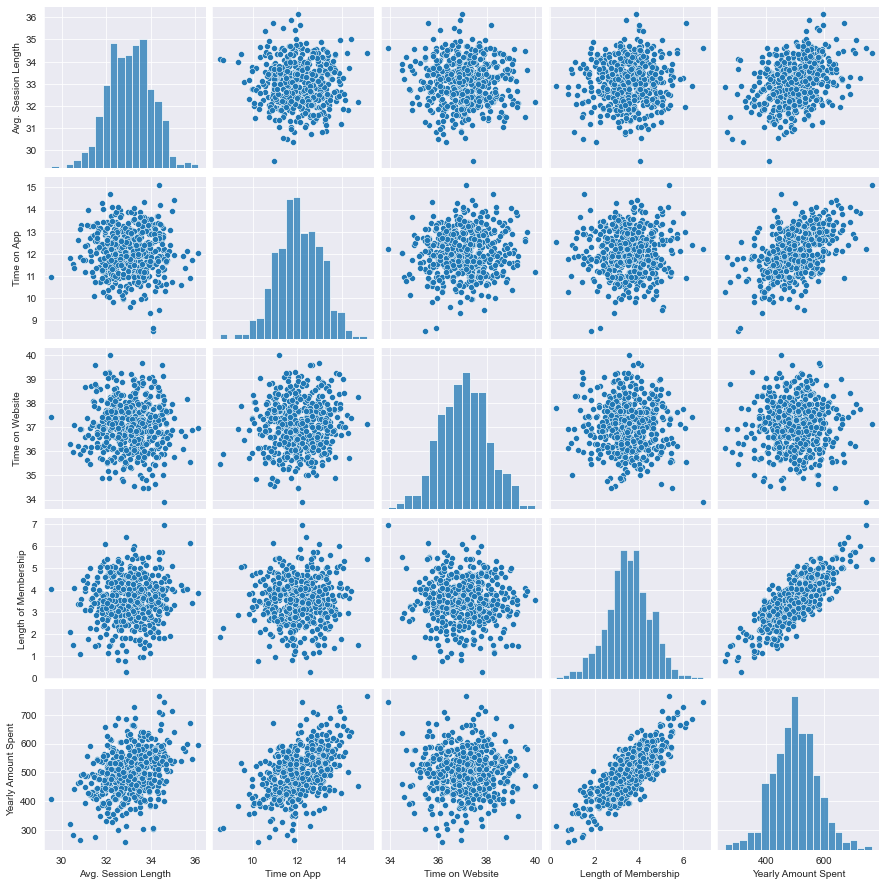

In [26]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

ans - Length of membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

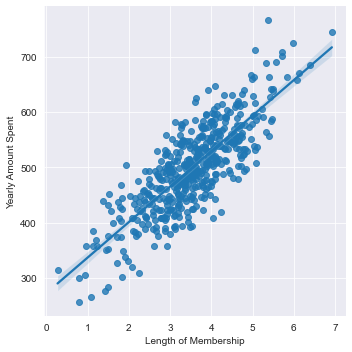

In [27]:
sns.lmplot(data=df, x='Length of Membership', y='Yearly Amount Spent')

<hr>

## Training and Testing Data

In [28]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [29]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

**Split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [58]:
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coefficients

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


<hr>

## Predictiong Test Data

In [38]:
predicted = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

<AxesSubplot: xlabel='Yearly Amount Spent'>

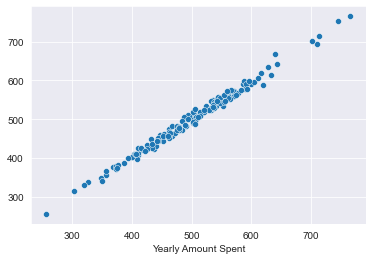

In [40]:
sns.scatterplot(x=y_test, y=predicted)

<hr>

## Evaluating the Model

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [42]:
from sklearn import metrics

In [48]:
MAE = metrics.mean_absolute_error(predicted, y_test)
MSE = metrics.mean_squared_error(predicted, y_test)
RMSE = metrics.mean_squared_error(predicted, y_test)**0.5

print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

MAE:  7.228148653430826
MSE:  79.81305165097427
RMSE:  8.933815066978624


<hr>

## Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Count'>

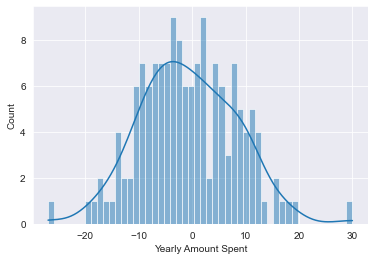

In [57]:
sns.histplot(y_test-predicted, bins=50, kde=True)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.

In [59]:
coefficients

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


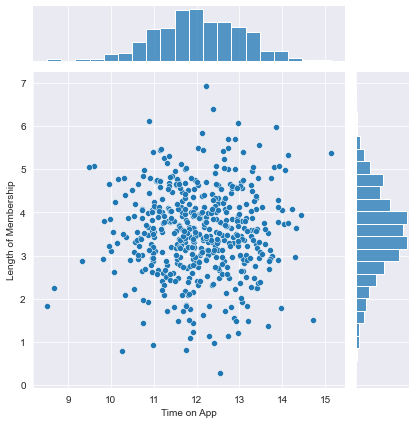

In [64]:
sns.jointplot(df, x='Time on App', y='Length of Membership')

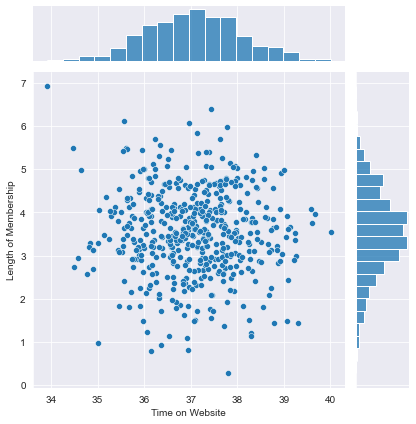

In [65]:
sns.jointplot(df, x='Time on Website', y='Length of Membership')

We conclude that, Membership Time is what is really important and there is no direct relationship between time spent on App or website to the length of membership.

<hr>